### Let's Start by importing dataframe libraries

In [0]:
import pandas as pd
import numpy as np

In [0]:
from google.colab import files
uploaded = files.upload()

Saving amazon_review.csv to amazon_review.csv


In [0]:
import io
amazon_review = pd.read_csv(io.BytesIO(uploaded['amazon_review.csv']))

/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Let's get the data, this dataset contains reviews on Amazon products and is available in Kaggle

Let's explore the data and see important characterstics of the dataframe

In [0]:
amazon_review.shape

(34660, 21)

In [0]:
amazon_review.columns

Index([u'id', u'name', u'asins', u'brand', u'categories', u'keys',
       u'manufacturer', u'reviews.date', u'reviews.dateAdded',
       u'reviews.dateSeen', u'reviews.didPurchase', u'reviews.doRecommend',
       u'reviews.id', u'reviews.numHelpful', u'reviews.rating',
       u'reviews.sourceURLs', u'reviews.text', u'reviews.title',
       u'reviews.userCity', u'reviews.userProvince', u'reviews.username'],
      dtype='object')

In [0]:
amazon_review.head(3)

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ


#### Since we are interested in making Bag of Model for Natural Language processing, we are interested in only two columns, Reviews and Ratings. but's let's take id and username too for the sake of uniqueness in reviews

In [0]:
nlp_data=amazon_review[['id','reviews.text','reviews.rating','reviews.username']]

In [0]:
nlp_data.head(5)

,id,reviews.text,reviews.rating,reviews.username
0,AVqkIhwDv8e3D1O-lebb,This product so far has not disappointed. My c...,5.0,Adapter
1,AVqkIhwDv8e3D1O-lebb,great for beginner or experienced person. Boug...,5.0,truman
2,AVqkIhwDv8e3D1O-lebb,Inexpensive tablet for him to use and learn on...,5.0,DaveZ
3,AVqkIhwDv8e3D1O-lebb,I've had my Fire HD 8 two weeks now and I love...,4.0,Shacks
4,AVqkIhwDv8e3D1O-lebb,I bought this for my grand daughter when she c...,5.0,explore42


Let's check if there is NaN values in ratings or not since, this values are target variables for our predictions

In [0]:
np.where(np.isnan(nlp_data['reviews.rating']))

(array([ 2886,  2887,  2888,  2889,  2890,  2891,  2892,  2893,  2894,
         2895,  2896,  2897,  2898,  2899,  2900,  2901,  2902,  2903,
         2904,  3691,  3692,  3693,  3694, 14727, 14728, 14729, 14731,
        14732, 21226, 21227, 21228, 21229, 29572]),)

Since, there are not too many datasets having NaN values and we don't want our model with wrong data so, let's drop these observations

In [0]:
nlp_data=nlp_data.drop([2886,  2887,  2888,  2889,  2890,  2891,  2892,  2893,  2894,
         2895,  2896,  2897,  2898,  2899,  2900,  2901,  2902,  2903,
         2904,  3691,  3692,  3693,  3694, 14727, 14728, 14729, 14731,
        14732, 21226, 21227, 21228, 21229, 29572])

In [0]:
nlp_data.reset_index(inplace=True)

In [0]:
nlp_data.shape

(34627, 5)

In [0]:
np.where(np.isnan(nlp_data['reviews.rating']))

(array([], dtype=int64),)

In [0]:
nlp_data.head()

,index,id,reviews.text,reviews.rating,reviews.username
0,0,AVqkIhwDv8e3D1O-lebb,This product so far has not disappointed. My c...,5.0,Adapter
1,1,AVqkIhwDv8e3D1O-lebb,great for beginner or experienced person. Boug...,5.0,truman
2,2,AVqkIhwDv8e3D1O-lebb,Inexpensive tablet for him to use and learn on...,5.0,DaveZ
3,3,AVqkIhwDv8e3D1O-lebb,I've had my Fire HD 8 two weeks now and I love...,4.0,Shacks
4,4,AVqkIhwDv8e3D1O-lebb,I bought this for my grand daughter when she c...,5.0,explore42


In [0]:
nlp_data.tail()

,index,id,reviews.text,reviews.rating,reviews.username
34622,34655,AVpfiBlyLJeJML43-4Tp,This is not appreciably faster than any other ...,3.0,Kris
34623,34656,AVpfiBlyLJeJML43-4Tp,Amazon should include this charger with the Ki...,1.0,Jonathan Stewart
34624,34657,AVpfiBlyLJeJML43-4Tp,Love my Kindle Fire but I am really disappoint...,1.0,J Lawson
34625,34658,AVpfiBlyLJeJML43-4Tp,I was surprised to find it did not come with a...,1.0,Just the Buyer
34626,34659,AVpfiBlyLJeJML43-4Tp,to spite the fact that i have nothing but good...,1.0,sandi


In [0]:
nlp_data.groupby('reviews.rating').count()

,index,id,reviews.text,reviews.username
reviews.rating,,,,
1.0,410,410,410,410
2.0,402,402,402,402
3.0,1499,1499,1499,1499
4.0,8541,8541,8541,8541
5.0,23775,23775,23774,23773


### Let's explore one of the review. User has written this fairly clean.

In [0]:
nlp_data['reviews.text'][0]

'This product so far has not disappointed. My children love to use it and I like the ability to monitor control what content they see with ease.'

Our approach of cleaning is simple. We will remove unncessary words, make them all lower case, make all derived words to roots called stemming, make a list of those words add back as reviews and store them in different list

In [0]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In this code we are removing everything except letters of words either cap or small

In [0]:
review = re.sub('[^a-zA-Z]', ' ', nlp_data['reviews.text'][0])
   

In [0]:
review

'This product so far has not disappointed  My children love to use it and I like the ability to monitor control what content they see with ease '

In [0]:
review = review.lower()

In [0]:
review

'this product so far has not disappointed  my children love to use it and i like the ability to monitor control what content they see with ease '

In [0]:
review = review.split()

In [0]:
review

['this',
 'product',
 'so',
 'far',
 'has',
 'not',
 'disappointed',
 'my',
 'children',
 'love',
 'to',
 'use',
 'it',
 'and',
 'i',
 'like',
 'the',
 'ability',
 'to',
 'monitor',
 'control',
 'what',
 'content',
 'they',
 'see',
 'with',
 'ease']

In [0]:
ps = PorterStemmer()
review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]

In [0]:
review

['product',
 'far',
 u'disappoint',
 'children',
 'love',
 'use',
 'like',
 u'abil',
 'monitor',
 'control',
 'content',
 'see',
 u'eas']

In [0]:
review = ' '.join(review)


In [0]:
review

u'product far disappoint children love use like abil monitor control content see eas'

Let's do this for all the reviews in the datasets. We are using Try and except so that, if there is any error on one or two columns then it should't effect our operations on other columns

In [0]:
error=[]
corpus = []
for i in range(0, 34627):
    try:
        review = re.sub('[^a-zA-Z]', ' ',nlp_data['reviews.text'][i])
        review = review.lower()
        review = review.split()
        review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
        review = ' '.join(review)
        corpus.append(review)
    except:
        error.extend([review,nlp_data['id'][i],nlp_data['reviews.rating'][i],nlp_data['reviews.username'][i]])

In [0]:
len(corpus)

34626

We can see, following operations gave error for following observations

In [0]:
error

[u'pleas purchas', 'AVsRjfwAU2_QcyX9PHqe', 5.0, 'lawrence s martin']

In [0]:
nlp_data.dtypes

index                 int64
id                   object
reviews.text         object
reviews.rating      float64
reviews.username     object
dtype: object

Let's find that observations in the dataset. We can see that there is no reviews but just rating

In [0]:
nlp_data[nlp_data['reviews.username']== 'lawrence s martin']

,index,id,reviews.text,reviews.rating,reviews.username
3092,3111,AVsRjfwAU2_QcyX9PHqe,NaN,5.0,lawrence s martin


Let's just drop this observation

In [0]:
nlp_data=nlp_data.drop([3092])

In [0]:
nlp_data.shape

(34626, 5)

In [0]:
nlp_data.head(3)

,index,id,reviews.text,reviews.rating,reviews.username
0,0,AVqkIhwDv8e3D1O-lebb,This product so far has not disappointed. My c...,5.0,Adapter
1,1,AVqkIhwDv8e3D1O-lebb,great for beginner or experienced person. Boug...,5.0,truman
2,2,AVqkIhwDv8e3D1O-lebb,Inexpensive tablet for him to use and learn on...,5.0,DaveZ


We can see that there is extra column of index because we changed the index. Let's just drop this column 

In [0]:
nlp_data.drop(['index'], axis=1,inplace=True)

In [0]:
nlp_data.head(3)

,id,reviews.text,reviews.rating,reviews.username
0,AVqkIhwDv8e3D1O-lebb,This product so far has not disappointed. My c...,5.0,Adapter
1,AVqkIhwDv8e3D1O-lebb,great for beginner or experienced person. Boug...,5.0,truman
2,AVqkIhwDv8e3D1O-lebb,Inexpensive tablet for him to use and learn on...,5.0,DaveZ


Now we need to make Bag of words model. We are just making matrix having columns of different words and each review is a row. Row having particular word in a column is 1 otherwise 0. This matrix would have many 0s so it is often called sparse matrix

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(corpus).toarray()
y = nlp_data.iloc[:, 2].values 

Let's split the data into train and test. We are taking only 20 percent of data as test so, that our model can learn from maximum data

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [0]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

/usr/local/lib/python2.7/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [0]:
y_train

array([5., 5., 4., ..., 5., 5., 2.])

Now let's fit a Naive Bayesian model to the training dataset

In [0]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

Let's predict the values based on X_test data and measure the accuracy

In [0]:
y_pred = classifier.predict(X_test)

Let's see the confusion matrix. 

In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [0]:
cm

array([[  28,    5,   19,   21,    3],
       [  26,    6,   14,   23,   10],
       [  99,   34,   65,   64,   26],
       [ 644,  226,  310,  382,  126],
       [1837,  651,  938, 1014,  355]])

Let's see how many of reviews were correctly rated.

In [0]:
s=pd.DataFrame({'true':y_test,'pred':y_pred})

In [0]:
s.shape

(6926, 2)

In [0]:
correct_pred=s[s['true']==s['pred']]

In [0]:
correct_pred.shape

(836, 2)

We can see only 836 variables have been correctly predicted which is very low and gives accuracy of 12 % only

Let's use K fold cross validation to measure the correct accuracy of the model

In [0]:
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=10)

In [0]:
accuracies

array([0.13306888, 0.13167388, 0.12698413, 0.1234657 , 0.13181654,
       0.13217768, 0.13181654, 0.13217768, 0.12423257, 0.12608382])

Let's actually try to cross validate the model using the whole datasets

In [0]:
accuracies=cross_val_score(estimator=classifier,X=X,y=y,cv=10)

In [0]:
accuracies

array([0.0984127 , 0.10796767, 0.09153913, 0.09096159, 0.11207395,
       0.11842865, 0.14789139, 0.1565569 , 0.14269209, 0.14851199])

In [0]:
accuracies.max()

0.15655690352397458

In [0]:
import matplotlib.pyplot as plt

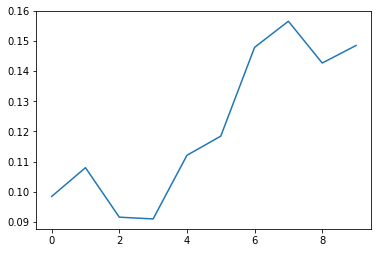

In [0]:
plt.plot(accuracies)
plt.xlabel("No of validations")
plt.ylabel("Accuracy")
plt.title("Accuracy for Naive Bayes Theorem")

Clearly this model is not working good. Let's try other models

Let's try Support Vector Machine Model. I truied to run the SVM Model but it took like a lot of time without any success. The reason is that SVM might not be a good model for this data because The SVM is usually trained using the dual objective. In this case, it needs to use a matrix called the Gram or kernel matrix that contains the similarities between all examples. Therefore with N examples, this matrix contains N^2 elements. When the dataset is large, e.g. larger that 100,000 examples, this costs a lot of time.
There are ways to circumvent this such as adding only examples which are further than some constant epsilon away from any other example, but research has shown that the final model loses some accuracy if such a trick is used.

In [0]:
# from sklearn.svm import SVC
# classifier_svm=SVC(kernel='linear')
# accuracies_svm=cross_val_score(estimator=classifier_svm,X=X_train,y=y_train,cv=10)

let's apply decision tree and see the accuracy

In [0]:
from sklearn.tree import DecisionTreeClassifier
classifier_dt= DecisionTreeClassifier(criterion='entropy')
classifier_dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [0]:
y_pred_dt=classifier_dt.predict(X_test)

In [0]:
cm_dt=confusion_matrix(y_test,y_pred_dt)

In [0]:
cm_dt

array([[  14,    4,    4,   15,   39],
       [   9,    2,   11,   23,   34],
       [  14,    6,   35,   91,  142],
       [  13,   18,   94,  549, 1014],
       [  27,   34,  108,  936, 3690]], dtype=int64)

In [0]:
s_dt=pd.DataFrame({'true':y_test,'pred':y_pred_dt})
s_dt.shape

(6926, 2)

In [0]:
correct_pred_dt=s_dt[s_dt['true']==s_dt['pred']]
correct_pred_dt.shape

(4290, 2)

In [0]:
accuracies_dt=cross_val_score(estimator=classifier_dt,X=X_train,y=y_train,cv=10)

In [0]:
accuracies_dt

array([0.60872701, 0.61363636, 0.61507937, 0.62202166, 0.61357891,
       0.61899603, 0.61574576, 0.61105092, 0.60852293, 0.59501445])

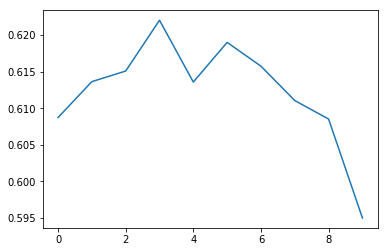

In [0]:
plt.plot(accuracies_dt)

Let's try Random forest

In [0]:
from sklearn.ensemble import RandomForestClassifier


In [0]:
classifier_rf=RandomForestClassifier(n_estimators=10, criterion='entropy')
classifier_rf.fit(X_train,y_train)
y_pred_rf=classifier_rf.predict(X_test)

In [0]:
cm_rf=confusion_matrix(y_test,y_pred_rf)
cm_rf

array([[   5,    3,    3,   14,   51],
       [   1,    0,    3,   21,   54],
       [   3,    0,   17,   66,  202],
       [   0,    3,   14,  359, 1312],
       [   5,    6,   14,  411, 4359]], dtype=int64)

In [0]:
s_rf=pd.DataFrame({'true':y_test,'pred':y_pred_rf})
s_rf.shape

(6926, 2)

In [0]:
correct_pred_rf=s_rf[s_rf['true']==s_rf['pred']]
correct_pred_rf.shape

(4740, 2)

In [0]:
accuracies_rf=cross_val_score(estimator=classifier_rf,X=X_train,y=y_train,cv=10)
accuracies_rf

array([0.67508114, 0.68181818, 0.67568543, 0.666787  , 0.67244493,
       0.67677862, 0.6756952 , 0.67894547, 0.66413868, 0.67232659])

In [0]:
classifier_rf_1=RandomForestClassifier(n_estimators=15, criterion='entropy')
accuracies_rf_1=cross_val_score(estimator=classifier_rf_1,X=X_train,y=y_train,cv=10)
accuracies_rf_1

array([0.69383339, 0.68975469, 0.69011544, 0.68447653, 0.69302997,
       0.69989166, 0.6818346 , 0.69050199, 0.69194655, 0.69183526])

In [0]:
classifier_rf_2=RandomForestClassifier(n_estimators=20, criterion='entropy')
accuracies_rf_2=cross_val_score(estimator=classifier_rf_2,X=X_train,y=y_train,cv=10)
accuracies_rf_2

array([0.69239091, 0.68795094, 0.68831169, 0.69277978, 0.68219574,
       0.7020585 , 0.68689057, 0.69772481, 0.68436259, 0.68641618])

In [0]:
classifier_rf_3=RandomForestClassifier(n_estimators=25, criterion='entropy')
accuracies_rf_3=cross_val_score(estimator=classifier_rf_3,X=X_train,y=y_train,cv=10)
accuracies_rf_3

array([0.69816084, 0.6955267 , 0.69805195, 0.69314079, 0.69194655,
       0.7020585 , 0.69266883, 0.69628025, 0.69555796, 0.6925578 ])

In [0]:
classifier_rf_4=RandomForestClassifier(n_estimators=12, criterion='entropy')
accuracies_rf_4=cross_val_score(estimator=classifier_rf_4,X=X_train,y=y_train,cv=10)
accuracies_rf_4

array([0.68589975, 0.68831169, 0.68073593, 0.67364621, 0.67208378,
       0.68833514, 0.66594438, 0.68436259, 0.68111231, 0.68858382])

In [0]:
classifier_rf_5=RandomForestClassifier(n_estimators=30, criterion='entropy')
accuracies_rf_5=cross_val_score(estimator=classifier_rf_5,X=X_train,y=y_train,cv=10)
accuracies_rf_5

array([0.69203029, 0.69588745, 0.70021645, 0.69494585, 0.69555796,
       0.70458649, 0.68039003, 0.70458649, 0.69772481, 0.70195087])

In [0]:
classifier_rf_6=RandomForestClassifier(n_estimators=40, criterion='entropy')
accuracies_rf_6=cross_val_score(estimator=classifier_rf_6,X=X_train,y=y_train,cv=10)
accuracies_rf_6

array([0.6974396 , 0.69949495, 0.6969697 , 0.69530686, 0.69483568,
       0.7020585 , 0.6897797 , 0.69916938, 0.69700253, 0.6875    ])

In [0]:
def average(lst): 
    return sum(lst) / len(lst)

In [0]:
accuracy_table=pd.DataFrame({'n_estimators':[10,12,15,20,25,30,40],'avg_accuracy':[average(accuracies_rf),average(accuracies_rf_4),average(accuracies_rf_1),average(accuracies_rf_2),average(accuracies_rf_3),average(accuracies_rf_5),average(accuracies_rf_6)]})

In [0]:
accuracy_table

,avg_accuracy,n_estimators
0,0.693103,10
1,0.680902,12
2,0.690722,15
3,0.690108,20
4,0.695595,25
5,0.696788,30
6,0.695956,40


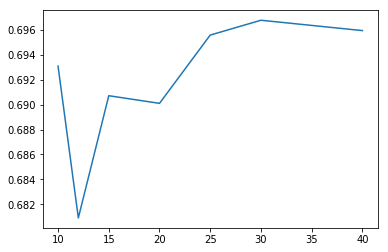

In [0]:
plt.plot(accuracy_table['n_estimators'],accuracy_table['avg_accuracy'])

We can see that we are using maximum accuracy at n_estimators as 30

Let's test our model once

In [0]:
x_1="I love the product, its really long lasting"
x_2="I hated the product, it was such a waste of money"
x_3="I fucking loved it"
x_4="Using this product was a nightmare"
sample=pd.DataFrame([x_1,x_2,x_3,x_4],columns=['review_sample'])
sample.shape

(4, 1)

In [0]:
review_1 = re.sub('[^a-zA-Z]', ' ', sample['review_sample'][0])
review_1

'I love the product  its really long lasting'

In [0]:
error_sample=[]
corpus_sample = []
for i in range(0, 5):
    try:
        review_1 = re.sub('[^a-zA-Z]', ' ',sample['review_sample'][i])
        review_1 = review_1.lower()
        review_1 = review_1.split()
        review_1 = [ps.stem(word) for word in review_1 if not word in set(stopwords.words('english'))]
        review_1 = ' '.join(review_1)
        corpus_sample.append(review_1)
    except:
        error_sample.extend(review_1)

In [0]:
len(corpus_sample)

4

In [0]:
corpus_sample=corpus+corpus_sample

In [0]:
len(corpus_sample)

34630

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_sample = cv.fit_transform(corpus_sample).toarray()
y_sample = nlp_data.iloc[:, 2].values

In [0]:
X_sample[34626:].shape

(4L, 9105L)

In [0]:
y_sample.shape

(34626L,)

In [0]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_sample=sc.fit_transform(X_sample[:34626])
X_test_sample=sc.transform(X_sample[34626:])

In [0]:
classifier_forest=RandomForestClassifier(n_estimators=30, criterion='entropy')
classifier_forest.fit(X_train_sample,y_sample)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [0]:
classifier_forest.predict(X_test_sample)

array([5., 1., 5., 5.])

### Now'let's use KNN to it and see if it increases the performance or not. I tried to do K Nearest Neighbors but due to data high dimensionality. KNN is not fit for this assignment.

In [0]:
# from sklearn.model_selection import cross_val_score
# from sklearn.neighbors import KNeighborsClassifier
# classifier_neighbor=KNeighborsClassifier(n_neighbors=5)
# accuracies_neigh=cross_val_score(estimator=classifier_neighbor,X=X_train,y=y_train,cv=10)
# accuracies_neigh

In [0]:
X_train.shape

(27700, 9103)

In [0]:
y_train.shape

(27700,)

In [0]:
dim =  9103
samples = 27700



```
Let's apply Neural Network using Keras and Tensorflow with 3 layers and Rectified Linear Unit Rectifier.
```



In [0]:

from numpy import concatenate
from matplotlib import pyplot
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM
from keras.callbacks import Callback
from keras.models import Sequential
from keras.layers import LSTM, Dense, Activation
import pickle
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sys
from queue import Queue
import json
%matplotlib inline

Using TensorFlow backend.


In [0]:
class LossHistory(Callback):
    def on_train_begin(self, logs={}):
        self.losses = []

    def on_batch_end(self, batch, logs={}):
        sys.stdout.write(str(logs.get('loss'))+str(', '))
        sys.stdout.flush()
        self.losses.append(logs.get('loss'))
        
lr = LossHistory()

In [0]:
number_of_neurons_layer1 = 9103
number_of_neurons_layer2 = 600
number_of_neurons_layer3 = 6
number_of_epochs = 20


In [0]:
# design network
from keras import optimizers
sgd = optimizers.SGD(lr=0.01, clipnorm=1.)

model = Sequential()
model.add(Dense(number_of_neurons_layer1,input_shape=(dim, ), activation='relu'))
model.add(Dense(number_of_neurons_layer2, activation='relu'))
model.add(Dense(number_of_neurons_layer3, activation='relu'))
model.compile(loss='sparse_categorical_crossentropy', optimizer=sgd)

def train(data,label):
    model.fit(data, label, epochs=number_of_epochs, batch_size=256, validation_data=(data, label), verbose=0, shuffle=True,callbacks=[lr])

def score(data):
    return model.predict(data)

In [0]:
print(X_train.shape,y_train.shape)

((27700, 9103), (27700,))


In [0]:
features=X_train
label=y_train


In [0]:
train(features,label)

8.5258045, 8.184097, 7.2915335, 6.9078884, 5.6541486, 5.1006827, 4.56131, 4.084955, 3.8280861, 3.748164, 3.5799592, 2.5998683, 2.4458306, 2.5780559, 2.2645564, 2.5102644, 2.0946822, 2.4690104, 1.7331532, 2.0524464, 1.8227752, 1.9436212, 1.1689336, 1.5928175, 1.6468891, 1.6298068, 1.960252, 1.7548585, 1.6995296, 1.6998484, 1.6299759, 1.4734762, 1.8579085, 1.5938057, 1.7101812, 1.6752429, 1.5659293, 1.8147506, 1.7456715, 1.8948585, 1.645361, 1.8150111, 1.9722674, 1.7463503, 1.5922841, 2.114231, 1.5640359, 1.6632743, 1.7854948, 1.565623, 2.060598, 1.7047925, 1.3777041, 1.5891597, 1.3140662, 1.8357993, 1.6192894, 1.6489757, 1.572437, 1.6323631, 1.5308151, 1.8871567, 1.873529, 1.7532512, 1.3909178, 1.4482514, 1.7468188, 1.4928079, 2.3479223, 2.1552858, 1.9924018, 1.9408281, 1.9204196, 1.8076015, 1.7967987, 2.0182376, 1.7293916, 1.9840852, 1.3165224, 1.78848, 1.7174362, 2.01023, 1.5203681, 1.5112995, 1.3626155, 1.2245438, 1.9457524, 1.3456028, 1.3970044, 1.7493469, 1.3453664, 1.703524, 1.360

Text(0.5,1,'Loss function with Stochastic Gradient Descent Optmization')

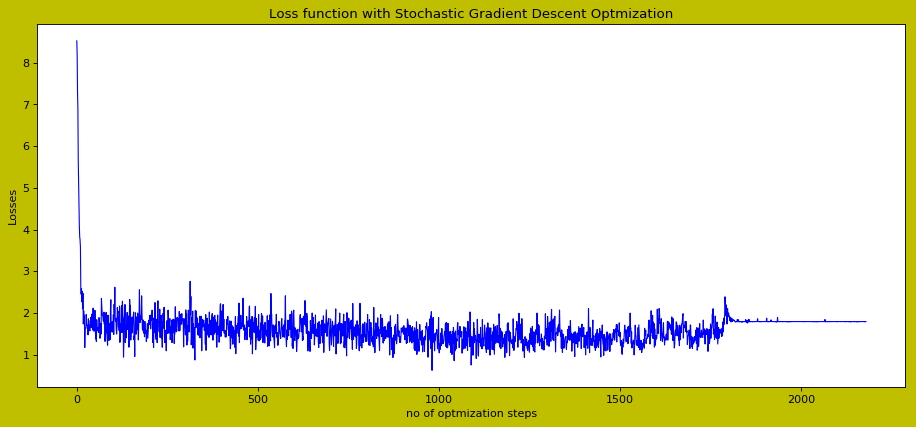

In [0]:
fig, ax = plt.subplots(num=None, figsize=(14, 6), dpi=80, facecolor='y', edgecolor='k')
size = len(lr.losses)
ax.plot(range(0,size), lr.losses, '-', color='blue', animated = True, linewidth=1)
plt.xlabel('no of optmization steps')
plt.ylabel('Losses')
plt.title('Loss function with Stochastic Gradient Descent Optmization')


In [0]:
min(lr.losses)

0.62245536

In [0]:
accuracy=100-min(lr.losses)

In [0]:
accuracy

99.37754464149475